[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
CAGR for AAPL: 31.68%
Average Volatility for AAPL: 28.05%
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
CAGR for MSFT: 24.68%
Average Volatility for MSFT: 25.06%
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
CAGR for GOOGL: 20.37%
Average Volatility for GOOGL: 25.82%


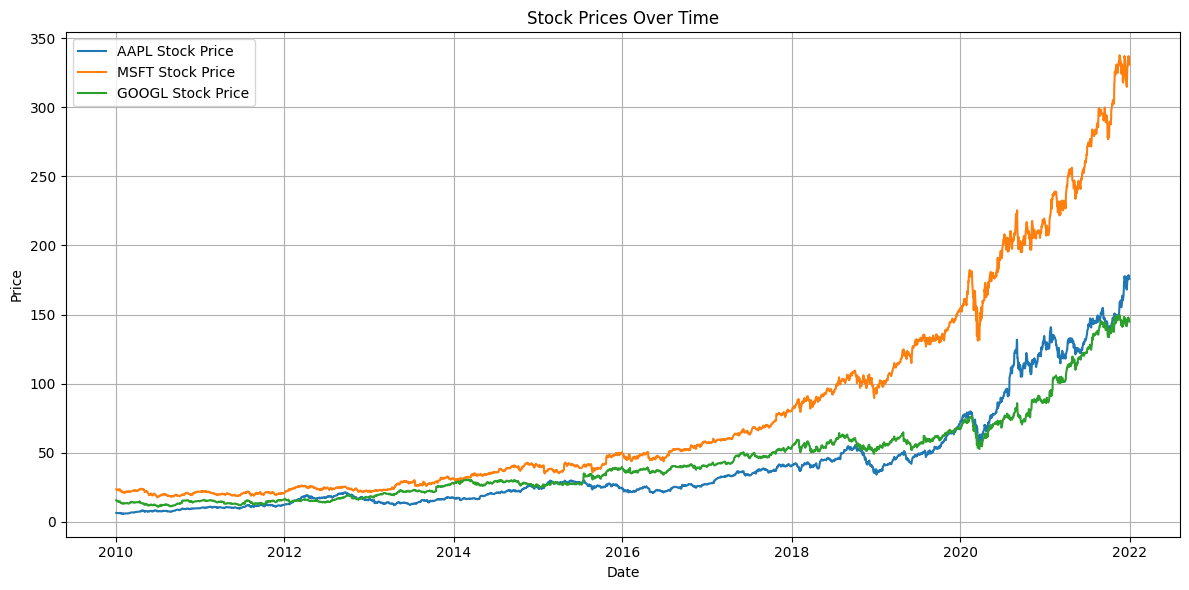

Average Yearly Dividends as Percentages:
Average Yearly Dividend for AAPL: 7.57%
Average Yearly Dividend for MSFT: 5.86%
Average Yearly Dividend for GOOGL: 0.00%


In [8]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock tickers
tickers = ["AAPL", "MSFT", "GOOGL"]

# Set the date range
start_date = "2010-01-01"
end_date = "2022-01-01"

# Create a figure for the combined chart
fig, ax = plt.subplots(figsize=(12, 6))

# Create an empty dictionary to store average yearly dividends
average_dividends = {}

# Fetch historical data for each ticker and calculate daily returns
for ticker in tickers:
    df = yf.download(ticker, start=start_date, end=end_date)
    
    # Calculate daily returns
    df["Daily_Return"] = df["Adj Close"].pct_change()
    
    # Fetch dividend data
    dividends = yf.download(ticker, start=start_date, end=end_date, actions=True)['Dividends']
    
    # Calculate total returns (assuming dividends are reinvested) for each ticker
    total_returns = (df / df.iloc[0]).fillna(1.0)
    
    # Calculate and print CAGR for each ticker
    price_at_start = df["Adj Close"].iloc[0]  # Use .iloc[] for positional indexing
    price_at_end = df["Adj Close"].iloc[-1]  # Use .iloc[] for positional indexing
    num_years = len(df) / 252  # Assuming 252 trading days in a year
    cagr = (price_at_end / price_at_start) ** (1 / num_years) - 1
    print(f"CAGR for {ticker}: {cagr:.2%}")
    
    # Calculate average volatility for each ticker
    daily_volatility = df["Adj Close"].pct_change().std()
    average_volatility = daily_volatility * (252 ** 0.5)  # Annualize
    print(f"Average Volatility for {ticker}: {average_volatility:.2%}")
    
    # Calculate average yearly dividend as a percentage of the stock's price
    if not dividends.empty:
        yearly_dividends = dividends.resample("Y").sum()
        average_yearly_dividend = (yearly_dividends / df["Adj Close"].iloc[0]).mean() * 100
        average_dividends[ticker] = average_yearly_dividend
    
    # Plot the stock prices for each ticker on the same subplot
    ax.plot(df.index, df["Adj Close"], label=f"{ticker} Stock Price")

# Set common labels and legend
ax.set_title("Stock Prices Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.grid(True)
ax.legend()

# Show the combined plot
plt.tight_layout()
plt.show()

# Print the average yearly dividends as percentages
print("Average Yearly Dividends as Percentages:")
for ticker, avg_dividend in average_dividends.items():
    print(f"Average Yearly Dividend for {ticker}: {avg_dividend:.2f}%")
